# Loan Default Prediction Model

In [2]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/loan-default-ii/lending_club_info.csv
/kaggle/input/loan-default-ii/lending_club_loan_two.csv
/kaggle/input/lending-club/accepted_2007_to_2018Q4.csv/accepted_2007_to_2018Q4.csv
/kaggle/input/lending-club/rejected_2007_to_2018Q4.csv/rejected_2007_to_2018Q4.csv


In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")  # Suppress all warnings

# "magic" command to make plots show up in the notebook
%matplotlib inline 

In [4]:
df = pd.read_csv('/kaggle/input/loan-default-ii/lending_club_loan_two.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [6]:
meta_data = pd.read_csv('/kaggle/input/loan-default-ii/lending_club_info.csv')

In [7]:
meta_data

,LoanStatNew,Description
0,loan_amnt,The listed amount of the loan applied for by t...
1,term,The number of payments on the loan. Values are...
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if th...
4,grade,LC assigned loan grade
5,sub_grade,LC assigned loan subgrade
6,emp_title,The job title supplied by the Borrower when ap...
7,emp_length,Employment length in years. Possible values ar...
8,home_ownership,The home ownership status provided by the borr...
9,annual_inc,The self-reported annual income provided by th...


In [8]:
df.shape

(396030, 27)

In [9]:
df.head().T

,0,1,2,3,4
loan_amnt,10000.0,8000.0,15600.0,7200.0,24375.0
term,36 months,36 months,36 months,36 months,60 months
int_rate,11.44,11.99,10.49,6.49,17.27
installment,329.48,265.68,506.97,220.65,609.33
grade,B,B,B,A,C
sub_grade,B4,B5,B3,A2,C5
emp_title,Marketing,Credit analyst,Statistician,Client Advocate,Destiny Management Inc.
emp_length,10+ years,4 years,< 1 year,6 years,9 years
home_ownership,RENT,MORTGAGE,RENT,RENT,MORTGAGE
annual_inc,117000.0,65000.0,43057.0,54000.0,55000.0


## Exploratory Data Analysis

<Axes: xlabel='loan_status', ylabel='count'>

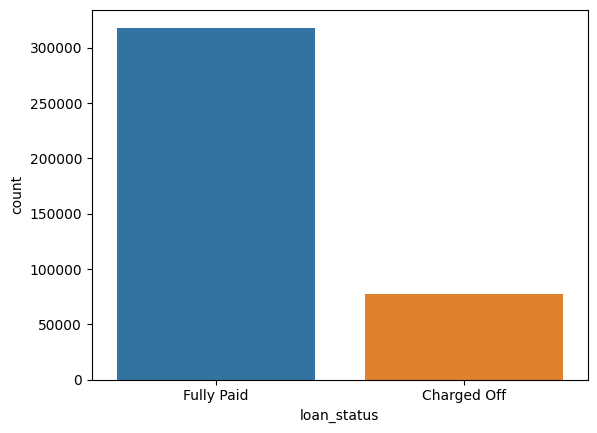

In [10]:
#distribution of our target variable
sns.countplot(x="loan_status",data=df)

there is class imbalance we have more cases of paid off then charged off 

In [11]:
df['loan_status'].value_counts()*100/len(df)

loan_status
Fully Paid     80.387092
Charged Off    19.612908
Name: count, dtype: float64

<Axes: xlabel='loan_amnt'>

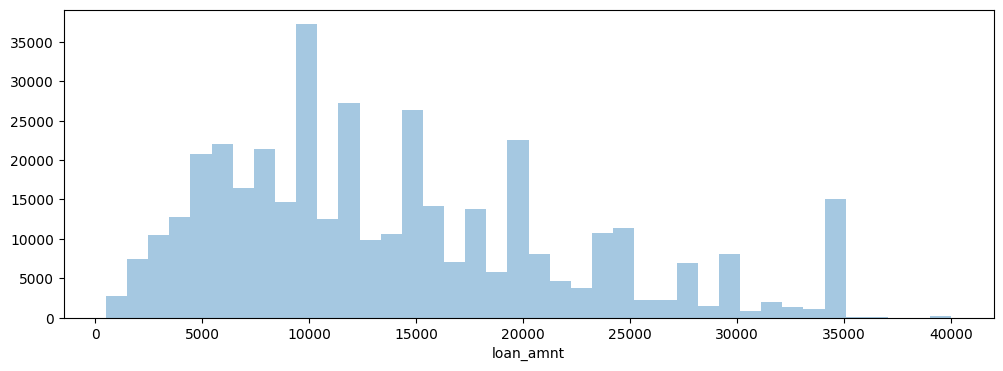

In [12]:
#distribution of loan amount
plt.figure(figsize=(12,4))
sns.distplot(df["loan_amnt"],kde=False,bins=40)

Dataset has a positive skewed distribution.

In [13]:
# Visualising correlation matrix
#plt.figure(figsize=(12,7))
#sns.heatmap(df.corr(),annot=True,cmap="viridis")

<Axes: xlabel='installment', ylabel='loan_amnt'>

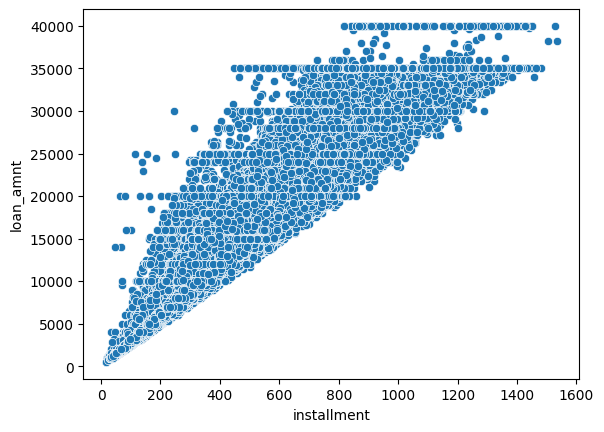

In [14]:
#creating scatter plot of installment and loan amount
sns.scatterplot(x="installment",y="loan_amnt",data=df)

<Axes: xlabel='loan_status', ylabel='loan_amnt'>

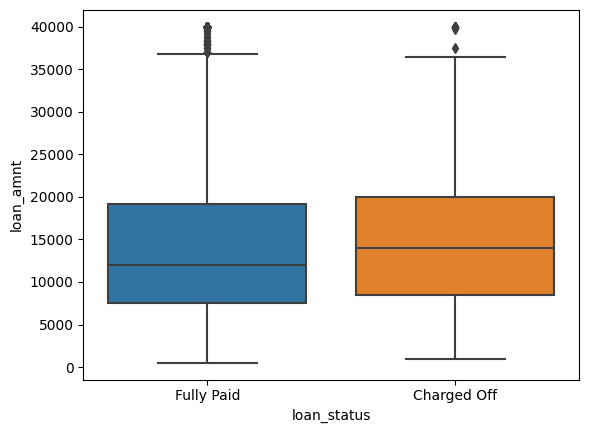

In [15]:
# creating boxplot 
sns.boxplot(x="loan_status",y="loan_amnt",data=df)

In [16]:
# checking mean value of loan approved 
df.groupby("loan_status")["loan_amnt"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


### Observation
From above graph and statistics we can say that there is not a much difference between the defaulters when we take loan amount into consideration

In [17]:
#checking unique values of grade
df["grade"].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

<Axes: xlabel='grade', ylabel='count'>

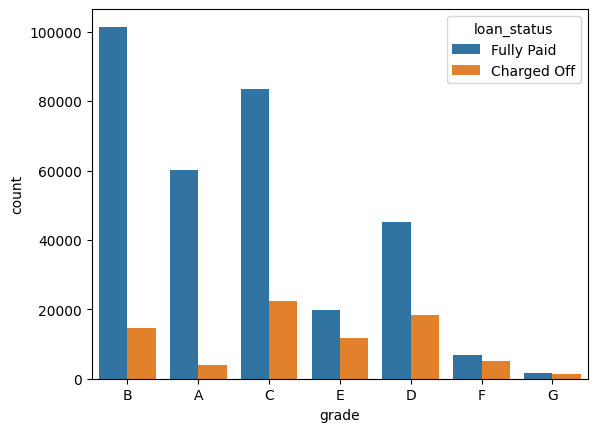

In [18]:
#checking plot for grade
sns.countplot(x="grade",hue="loan_status",data=df)

In [19]:
df[df['grade'] == 'A'].groupby('loan_status')['grade'].count()*100/len(df[df['grade'] == 'A']) 

loan_status
Charged Off     6.287878
Fully Paid     93.712122
Name: grade, dtype: float64

In [20]:
df[df['grade'] == 'B'].groupby('loan_status')['grade'].count()*100/len(df[df['grade'] == 'B']) 

loan_status
Charged Off    12.573049
Fully Paid     87.426951
Name: grade, dtype: float64

In [21]:
df[df['grade'] == 'C'].groupby('loan_status')['grade'].count()*100/len(df[df['grade'] == 'C']) 

loan_status
Charged Off    21.1809
Fully Paid     78.8191
Name: grade, dtype: float64

In [22]:
#checking unique values for subgrade
df["sub_grade"].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

<Axes: xlabel='sub_grade', ylabel='count'>

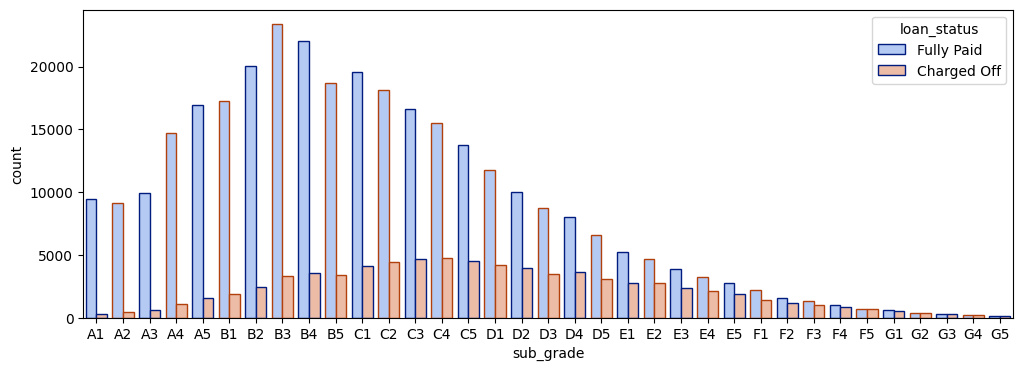

In [23]:
# Creating sub grade plot
plt.figure(figsize=(12,4))
sub_order=sorted(df["sub_grade"].unique())
sns.countplot(x='sub_grade',data=df,order=sub_order,palette="coolwarm",hue="loan_status",
              edgecolor=sns.color_palette("dark", 2))

### Observation
It looks like F and G subgrades don't get paid back that often.

In [24]:
#replacing fully paid with 1 and charge off as 0
df["loan_status"]=df["loan_status"].apply(lambda x : 1 if x=="Fully Paid" else 0)

In [25]:
#creating corelation plot
#df.corr()["loan_status"].sort_values().drop("loan_status").plot(kind="bar")

<Axes: xlabel='verification_status', ylabel='count'>

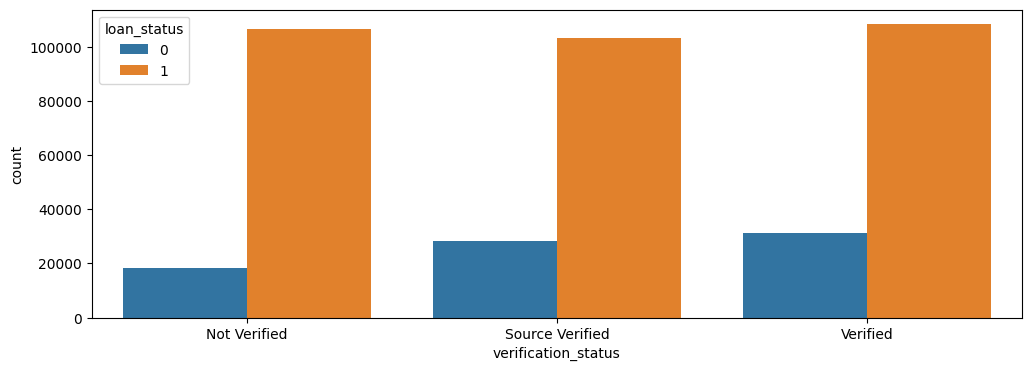

In [26]:
#verification status graph
plt.figure(figsize=(12,4))
sns.countplot(x="verification_status",data=df,hue="loan_status")

## Missing Data

In [27]:
#checking missing values in %
(df.isnull().sum()/len(df))*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

In [28]:
df["emp_title"].value_counts()

emp_title
Teacher                    4389
Manager                    4250
Registered Nurse           1856
RN                         1846
Supervisor                 1830
                           ... 
Postman                       1
McCarthy & Holthus, LLC       1
jp flooring                   1
Histology Technologist        1
Gracon Services, Inc          1
Name: count, Length: 173105, dtype: int64

In [29]:
df['emp_title'].nunique()

173105

In [30]:
#dropping the emp title since too many professions are there
df.drop("emp_title",axis=1,inplace=True)

In [31]:
#checking unique values in employ length
sorted(df["emp_length"].dropna().unique())

['1 year',
 '10+ years',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '< 1 year']

In [32]:
#creating an ordered list of employes
emp_order=['< 1 year',
 '1 year',
 '2 years',
 '3 years',
 '4 years',
 '5 years',
 '6 years',
 '7 years',
 '8 years',
 '9 years',
 '10+ years'
 ]

<Axes: xlabel='emp_length', ylabel='count'>

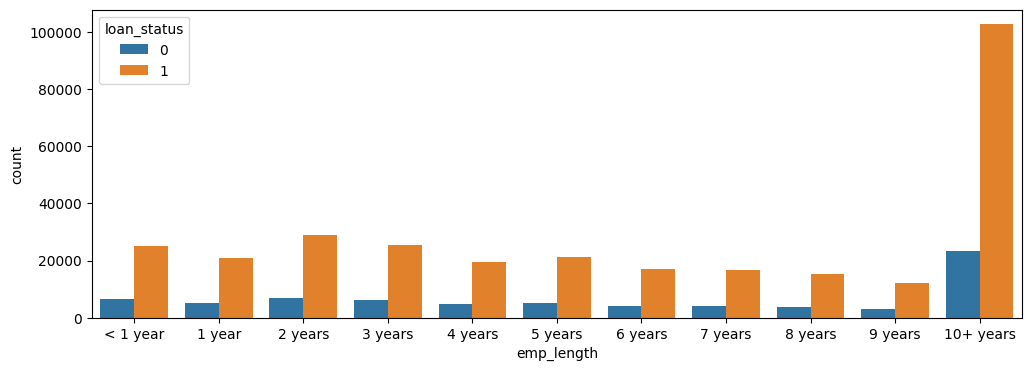

In [33]:
#creating employ length count plot setting hue as loan status
plt.figure(figsize=(12,4))
sns.countplot(x="emp_length",data=df,order=emp_order,hue="loan_status")

In [34]:
#count of people those who didnt pay considering there emp length
emp_co=df[df["loan_status"]==0].groupby("emp_length").count()["loan_status"]

#count of people those who did pay considering there emp length
emp_fp=df[df["loan_status"]==1].groupby("emp_length").count()["loan_status"]

<Axes: xlabel='emp_length'>

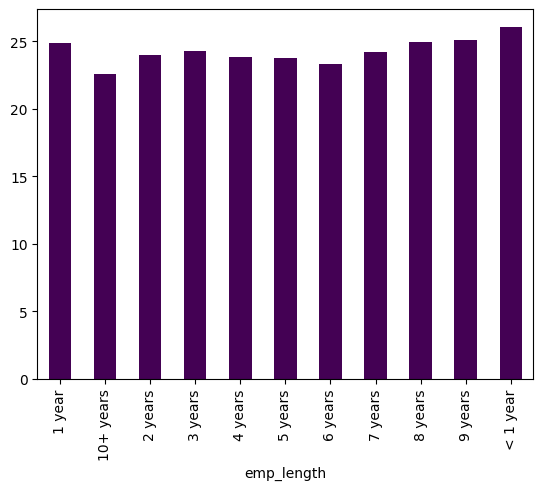

In [35]:
# % of people whoc didnt pay there loan considering there emp length
co_pre=emp_co*100/emp_fp

co_pre.plot(kind="bar",colormap="viridis")

In [36]:
#hence dropping emp length
df.drop("emp_length",axis=1,inplace=True)

In [37]:
(df.isnull().sum()/len(df))*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

In [38]:
df["purpose"].head(10)

0              vacation
1    debt_consolidation
2           credit_card
3           credit_card
4           credit_card
5    debt_consolidation
6      home_improvement
7           credit_card
8    debt_consolidation
9    debt_consolidation
Name: purpose, dtype: object

In [39]:
df['title'].head(10)

0                   Vacation
1         Debt consolidation
2    Credit card refinancing
3    Credit card refinancing
4      Credit Card Refinance
5         Debt consolidation
6           Home improvement
7       No More Credit Cards
8         Debt consolidation
9         Debt Consolidation
Name: title, dtype: object

In [40]:
#since reflecting the same information hence dropping the column
df.drop("title",inplace=True,axis=1)

In [41]:
#mortage accounts count
df["mort_acc"].value_counts()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

In [42]:
#filling the mortage value
#df.corr()["mort_acc"].sort_values()

In [43]:
df["mort_acc"]=df["mort_acc"].fillna(np.mean(df["mort_acc"]))

In [44]:
#dropping remaining data
df.dropna(inplace=True)

In [45]:
(df.isnull().sum()/len(df))*100

loan_amnt               0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
dti                     0.0
earliest_cr_line        0.0
open_acc                0.0
pub_rec                 0.0
revol_bal               0.0
revol_util              0.0
total_acc               0.0
initial_list_status     0.0
application_type        0.0
mort_acc                0.0
pub_rec_bankruptcies    0.0
address                 0.0
dtype: float64

## Categorical Variables and Dummy Variables

In [46]:
df.select_dtypes(["object"]).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

In [47]:
#converting 36 month to 36 numeric and same for 60
df["term"]=df["term"].apply(lambda x:int(x[:3]))

In [48]:
# dropping dropping grade
df.drop("grade",axis=1,inplace=True)

In [49]:
#converting the sub grade into dummy variables
dummies=pd.get_dummies(df["sub_grade"],drop_first=True)

#concatinating with orginal data
df=pd.concat([df.drop("sub_grade",axis=1),dummies],axis=1)

In [50]:
#doing same thing for other categorical variables
dummies=pd.get_dummies(df[['verification_status', 'application_type','initial_list_status','purpose']],drop_first=True)

#concatinating with orginal data
df=pd.concat([df.drop(['verification_status', 'application_type','initial_list_status','purpose'],axis=1),dummies],axis=1)

In [51]:
#checking the home ownership
df["home_ownership"].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: count, dtype: int64

In [52]:
#replacing none and any with other
df["home_ownership"]=df["home_ownership"].replace(["NONE","ANY"],"OTHER")

In [53]:
#dropping and adding 
dummies=pd.get_dummies(df["home_ownership"],drop_first=True)

#concatinating with orginal data
df=pd.concat([df.drop("home_ownership",axis=1),dummies],axis=1)

In [54]:
#grabbing only last zip code of the address
df["Zip"]=df["address"].apply(lambda x:x[-5:])

In [55]:
#getting value counts to verify whether to convert into dummy or not
df["Zip"].value_counts()

Zip
70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: count, dtype: int64

In [56]:
#converting into dummy variable
dummies=pd.get_dummies(df["Zip"],drop_first=True)

#concatinating with orginal data
df=pd.concat([df.drop("Zip",axis=1),dummies],axis=1)

In [57]:
#dropping address column
df.drop("address",axis=1,inplace=True)

In [58]:
#dropping issue date
df.drop("issue_d",axis=1,inplace=True)

In [59]:
#earliest cr line extracting the year only
df["earliest_cr_line"]=df["earliest_cr_line"].apply(lambda x:int(x[-4:]))

In [60]:
#keeping public record as 0 if 0 and the rest as 1
df["pub_rec"]=df["pub_rec"].apply(lambda x: 0 if x==0 else 1)

In [61]:
cols = df.select_dtypes(["object"]).columns

In [62]:
def ordinal_mapper(data, var):
    ordinal_map = {k:i for i,k in enumerate(data[var].unique(),0)}
    data[var] = data[var].map(ordinal_map)

In [63]:
for var in cols:
    ordinal_mapper(df,var)

## Train Test Split

In [64]:
#sampling the data
data=df.sample(frac=.5,random_state=101)

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
#dividing data into feature and target
X=data.drop("loan_status",axis=1).values
y=data["loan_status"].values

#spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

## Normalizing the Data

In [67]:
from sklearn.preprocessing import MinMaxScaler

In [68]:
#scaling the data
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Creating the Model

In [69]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
import logging
logging.getLogger('tensorflow').setLevel(logging.ERROR)
from tensorflow.keras.callbacks import EarlyStopping

2025-09-22 16:48:39.851058: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1758559720.124575     800 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1758559720.209541     800 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [70]:
#running model
#creating model 
model = Sequential()

#adding layer
model.add(Dense(78,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(39,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(19,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(19,activation="relu"))
model.add(Dropout(0.2))

model.add(Dense(units=1,activation="sigmoid"))

model.compile(loss="binary_crossentropy",optimizer="adam")

#parameters for early stopping
early_stop=EarlyStopping(monitor="val_loss",mode="min",verbose=1,patience=5)

2025-09-22 16:48:49.094226: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [71]:
#running the model
model.fit(x=X_train,y=y_train,epochs=25,batch_size=256,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/25
618/618 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - loss: 0.4425 - val_loss: 0.2691
Epoch 2/25
618/618 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.2807 - val_loss: 0.2633
Epoch 3/25
618/618 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.2704 - val_loss: 0.2631
Epoch 4/25
618/618 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.2683 - val_loss: 0.2619
Epoch 5/25
618/618 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.2626 - val_loss: 0.2618
Epoch 6/25
618/618 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.2637 - val_loss: 0.2610
Epoch 7/25
618/618 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.2629 - val_loss: 0.2625
Epoch 8/25
618/618 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.2620 - val_loss: 0.2612
Epoch 9/25
618/618 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.2595 - val_loss: 0.2613
Epoch 10/25
618/618 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.2589 - val_loss: 0.2612
Epoch 11/25
618/618 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.2632 - val_loss: 0.2612
Epoch 11: early stopping


<Axes: >

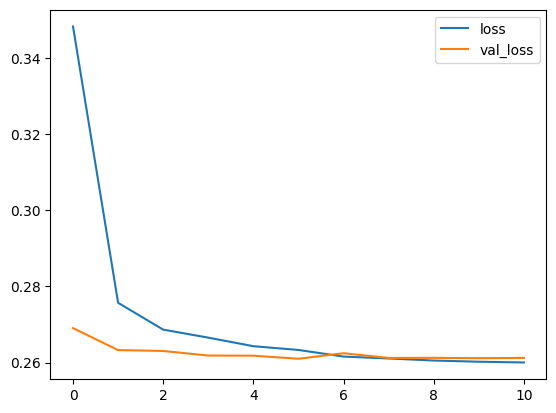

In [72]:
#plotting the losses
loss=pd.DataFrame(model.history.history)

loss.plot()

In [73]:
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score,auc

predict_x=model.predict(X_test)
predict = (predict_x > 0.5).astype("int32")
print(classification_report(y_test,predict))

1236/1236 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
              precision    recall  f1-score   support

           0       1.00      0.43      0.60      7947
           1       0.87      1.00      0.93     31575

    accuracy                           0.89     39522
   macro avg       0.94      0.72      0.77     39522
weighted avg       0.90      0.89      0.87     39522



In [74]:
pd.DataFrame(confusion_matrix(y_test,predict))

,0,1
0,3418,4529
1,3,31572


In [75]:
#trying other Models
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

In [76]:
clf=[LinearSVC(),
     LogisticRegression(random_state=0,solver='lbfgs',max_iter=1000),
     GaussianNB(),
     RandomForestClassifier(random_state=0,n_estimators=10)]

In [77]:
def model_clf(x):
    cl=x
    cl.fit(X_train,y_train)
    predict=cl.predict(X_test)
    print(classification_report(y_test,predict))

In [78]:
for x in clf:
    model_clf(x)

              precision    recall  f1-score   support

           0       0.98      0.44      0.61      7947
           1       0.88      1.00      0.93     31575

    accuracy                           0.89     39522
   macro avg       0.93      0.72      0.77     39522
weighted avg       0.90      0.89      0.87     39522

              precision    recall  f1-score   support

           0       0.96      0.46      0.62      7947
           1       0.88      0.99      0.93     31575

    accuracy                           0.89     39522
   macro avg       0.92      0.73      0.78     39522
weighted avg       0.89      0.89      0.87     39522

              precision    recall  f1-score   support

           0       0.70      0.57      0.63      7947
           1       0.90      0.94      0.92     31575

    accuracy                           0.86     39522
   macro avg       0.80      0.75      0.77     39522
weighted avg       0.86      0.86      0.86     39522

              preci

## Sampling the data

In [79]:
#creating function which samples equal classes
from sklearn.utils import shuffle

def sampling_k_elements(group, k=77000):
    if len(group) < k:
        return group
    return group.sample(k)

data = df.groupby('loan_status').apply(sampling_k_elements).reset_index(drop=True)
data=shuffle(data)

In [80]:
#dividing data into feature and target
X=data.drop("loan_status",axis=1).values
y=data["loan_status"].values

#spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

#scaling the data
#scaling the data
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [81]:
#running the model
model.fit(x=X_train,y=y_train,epochs=25,batch_size=256,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/25
482/482 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3692 - val_loss: 0.3646
Epoch 2/25
482/482 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3573 - val_loss: 0.3610
Epoch 3/25
482/482 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3589 - val_loss: 0.3603
Epoch 4/25
482/482 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3590 - val_loss: 0.3609
Epoch 5/25
482/482 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.3570 - val_loss: 0.3607
Epoch 6/25
482/482 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3565 - val_loss: 0.3593
Epoch 7/25
482/482 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3556 - val_loss: 0.3606
Epoch 8/25
482/482 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3550 - val_loss: 0.3601
Epoch 9/25
482/482 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3551 - val_loss: 0.3604
Epoch 10/25
482/482 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3551 - val_loss: 0.3620
Epoch 11/25
482/482 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.3513 - val_loss: 0.3601
Epoch 11: early stopping


<Axes: >

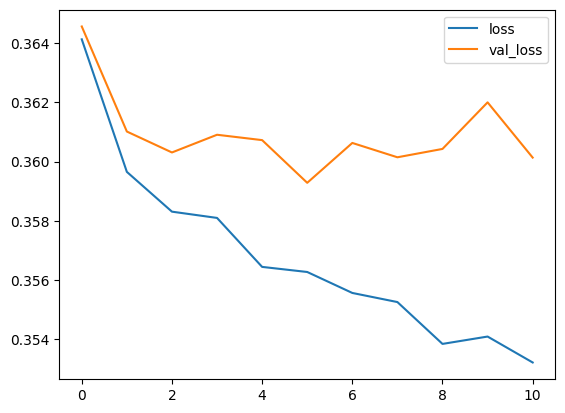

In [82]:
#plotting the losses
loss=pd.DataFrame(model.history.history)

loss.plot()

In [83]:
predict_x=model.predict(X_test)
predict = (predict_x > 0.5).astype("int32")
print(classification_report(y_test,predict))

963/963 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step
              precision    recall  f1-score   support

           0       0.79      0.82      0.80     15431
           1       0.81      0.77      0.79     15369

    accuracy                           0.80     30800
   macro avg       0.80      0.80      0.80     30800
weighted avg       0.80      0.80      0.80     30800



In [84]:
for x in clf:
    model_clf(x)

              precision    recall  f1-score   support

           0       0.80      0.81      0.80     15431
           1       0.80      0.79      0.80     15369

    accuracy                           0.80     30800
   macro avg       0.80      0.80      0.80     30800
weighted avg       0.80      0.80      0.80     30800

              precision    recall  f1-score   support

           0       0.80      0.81      0.80     15431
           1       0.80      0.79      0.80     15369

    accuracy                           0.80     30800
   macro avg       0.80      0.80      0.80     30800
weighted avg       0.80      0.80      0.80     30800

              precision    recall  f1-score   support

           0       0.89      0.56      0.69     15431
           1       0.68      0.93      0.79     15369

    accuracy                           0.75     30800
   macro avg       0.79      0.75      0.74     30800
weighted avg       0.79      0.75      0.74     30800

              preci

## Modeling with XGBoost

In [85]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

# Define XGBoost model with basic parameters
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    scale_pos_weight=(y_train == 0).sum() / (y_train == 1).sum(),  # handle imbalance
    random_state=42
)

# Train the model
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [86]:
# Predict
y_pred_xgb = xgb_model.predict(X_test)
y_proba_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Classification Report (XGBoost):\n", classification_report(y_test, y_pred_xgb))
print("ROC AUC Score (XGBoost):", roc_auc_score(y_test, y_proba_xgb))

Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.80      0.80      0.80     15431
           1       0.80      0.80      0.80     15369

    accuracy                           0.80     30800
   macro avg       0.80      0.80      0.80     30800
weighted avg       0.80      0.80      0.80     30800

ROC AUC Score (XGBoost): 0.9051249634216978


## Model Explainability with SHAP

In [87]:
import shap

# Explain using TreeExplainer (optimized for XGBoost)
explainer = shap.Explainer(xgb_model, X_test)

# Compute SHAP values for test set
shap_values = explainer(X_test)

 99%|===================| 30517/30800 [01:35<00:00]        

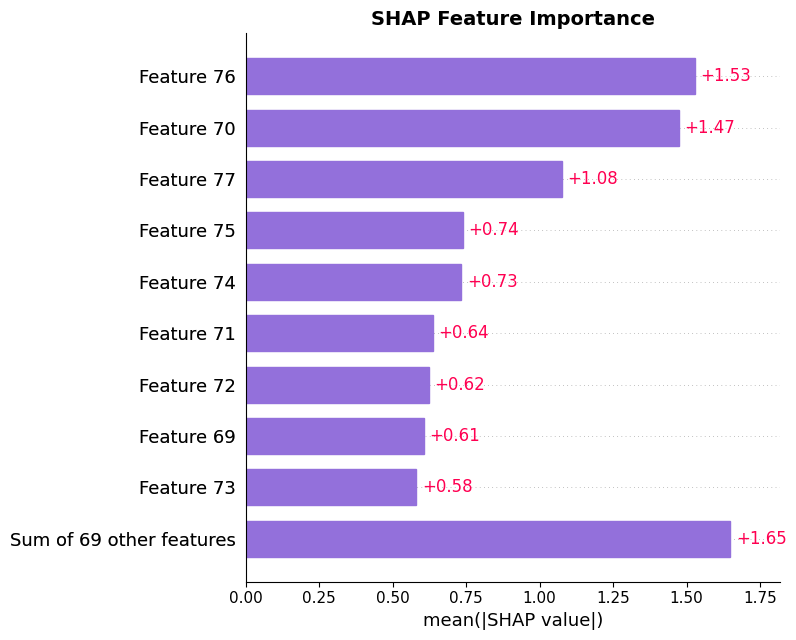

In [88]:
import shap
import matplotlib.pyplot as plt
import matplotlib as mpl

# Use SHAP's matplotlib backend
shap.plots.bar(shap_values, max_display=10, show=False)

# Manually set purple theme
fig = plt.gcf()
ax = plt.gca()
for bar in ax.patches:
    bar.set_color("mediumpurple")  # You can try 'orchid', 'darkorchid', etc.

# Style
plt.title("SHAP Feature Importance", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.savefig("C:\\Users\\hp\\Documents\\GitHub\\loan-default-prediction-with-explainable-ai\\assets\\shap_summary_bar.png", dpi=300)
plt.show()

 99%|===================| 30585/30800 [01:34<00:00]        

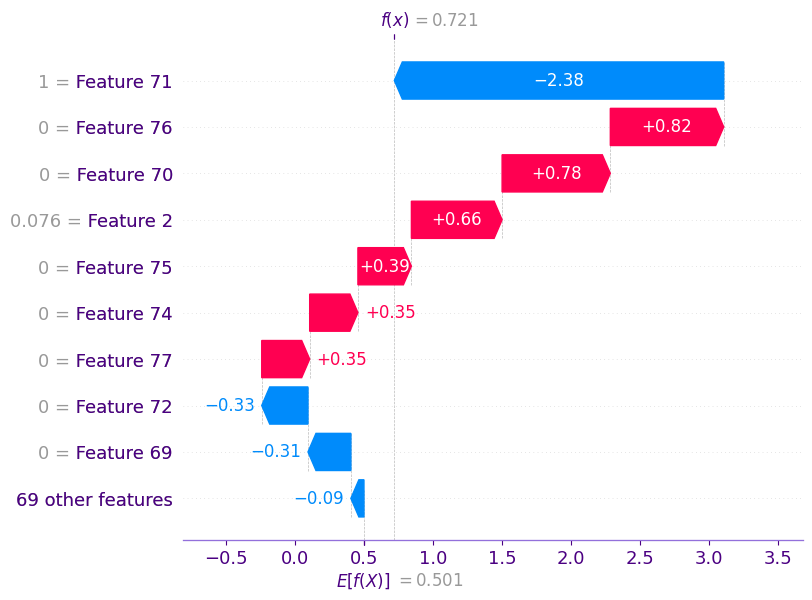

In [97]:
import shap
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd

# Step 1: Reset test set index
X_test_reset = pd.DataFrame(X_test).reset_index(drop=True)
y_test_reset = pd.DataFrame(y_test).reset_index(drop=True)
X_test_reset.columns = pd.DataFrame(X_test).columns

# Step 2: Get SHAP values
shap_values = explainer(X_test)

# Step 3: Pick a positive sample
sample_index = list(y_test_reset[y_pred_xgb == 1].index)[0]

# Step 4: Set visual theme
mpl.rcParams.update({
    'axes.edgecolor': '#9370DB',  # medium purple
    'text.color': '#4B0082',
    'axes.labelcolor': '#4B0082',
    'xtick.color': '#4B0082',
    'ytick.color': '#4B0082',
    'font.size': 11,
    'axes.titlesize': 14
})

# Step 5: Plot waterfall and store fig object
waterfall_plot = shap.plots.waterfall(shap_values[sample_index], max_display=10, show=False)

# Step 6: Save the SHAP decision plot
waterfall_plot.figure.savefig("shap_waterfall_plot.png", bbox_inches="tight", dpi=300)
plt.show()

In [114]:
#waterfall_plot1 = shap.summary_plot(shap_values, X_test_reset, feature_names=X_test_reset.columns)
#plt.show()

In [98]:
#Explanation
vals = shap_values[sample_index].values
features = X_test_reset.columns.tolist()
data = shap_values[sample_index].data

# Zip into readable format
explanation = sorted(zip(features, data, vals), key=lambda x: abs(x[2]), reverse=True)

print("Top Reasons for Prediction:")
for feat, val, impact in explanation[:5]:
    direction = "increased" if impact > 0 else "decreased"
    print(f"- {feat}: {val:.2f} → {direction} prediction by {abs(impact):.2f}")

Top Reasons for Prediction:
- 71: 1.00 → decreased prediction by 2.38
- 76: 0.00 → increased prediction by 0.82
- 70: 0.00 → increased prediction by 0.78
- 2: 0.08 → increased prediction by 0.66
- 75: 0.00 → increased prediction by 0.39


In [113]:
df.columns[2]

'int_rate'

In [120]:
df.sample(10)

,loan_amnt,term,int_rate,installment,annual_inc,loan_status,dti,earliest_cr_line,open_acc,pub_rec,...,RENT,05113,11650,22690,29597,30723,48052,70466,86630,93700
374734,10000.0,36,11.53,329.91,55000.0,1,30.85,1990,14.0,0,...,False,False,False,False,False,False,False,True,False,False
158187,15000.0,36,13.99,512.60,60361.0,1,14.87,2005,8.0,0,...,False,False,False,False,True,False,False,False,False,False
143595,15500.0,36,11.99,514.75,85000.0,1,12.75,2000,6.0,0,...,False,False,False,False,True,False,False,False,False,False
250391,24250.0,36,15.61,847.90,75696.0,1,8.56,2001,7.0,0,...,True,False,False,True,False,False,False,False,False,False
295509,5300.0,36,9.99,171.00,40000.0,1,24.63,2002,7.0,0,...,True,True,False,False,False,False,False,False,False,False
220469,18000.0,36,13.98,615.03,60000.0,1,24.80,2002,11.0,0,...,True,False,False,False,False,False,True,False,False,False
186744,9000.0,36,17.76,324.29,110000.0,1,15.56,2003,15.0,0,...,True,False,False,False,False,False,True,False,False,False
83033,30225.0,36,19.22,1111.30,110000.0,0,12.50,1989,12.0,0,...,False,False,False,False,False,False,False,False,False,True
21618,12075.0,36,13.11,407.50,65000.0,0,32.76,2000,14.0,0,...,False,False,False,False,False,False,False,False,True,False
289969,7000.0,36,19.52,258.44,76200.0,1,15.17,1988,10.0,0,...,False,False,False,True,False,False,False,False,False,False
